### ACS experiment performance (barchart)

Here we plot Figure 4B

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from mosaiks import config as c
from mosaiks.plotting import fig_2_functions as f2
%matplotlib inline

In [2]:
save_dir = Path(c.res_dir, "figures", "Fig4")
save_dir.mkdir(exist_ok=True, parents=True)

# Get task names in the specified order

In [3]:
c.app_order = [
    "B08303",
    "B15003",
    "B19013",
    "B19301",
    "C17002",
    "B22010",
    "B25071",
    "B25001",
    "B25002",
    "B25035",
    "B25017",
    "B25077",
]

In [4]:
# get task names
c_by_app_acs = [getattr(c, i) for i in c.app_order]
tasks = [config["application"] for config in c_by_app_acs]
num_tasks = len(tasks)

task_names_acs = np.array([config["disp_name_short"] for config in c_by_app_acs])

# Grab and aggregate the data files from the primary analysis for plotting

In [5]:
data_by_task_acs = f2.aggregrate_and_bin_data(agg_scale=0.2, is_ACS=True)
print("dataset sizes are:")
[
    print("{0}: {1}".format(tasks[t], len(data_by_task_acs["truth_by_task"][t])))
    for t in range(num_tasks)
]

/shares/lab/Datasets/Remote_Sensing/replication/code_JP/code/mosaiks/plotting/fig_2_functions.py:350: RuntimeWarning: invalid value encountered in true_divide
  vals_grid = sums_grid / counts


dataset sizes are:
B08303: 78449
B15003: 78680
B19013: 73184
B19301: 78579
C17002: 78341
B22010: 78251
B25071: 49858
B25001: 79489
B25002: 78299
B25035: 75620
B25017: 78299
B25077: 69356


[None, None, None, None, None, None, None, None, None, None, None, None]

# Plot  Fig 2

In [6]:
# collect and plot r2s for ACS regs:
r2s_acs = np.zeros(len(tasks))
for i in range(len(tasks)):
    y_pred_this = data_by_task_acs["preds_by_task"][i]
    y_true_this = data_by_task_acs["truth_by_task"][i]
    r2s_acs[i] = sklearn.metrics.r2_score(y_true_this, y_pred_this)

acs_descending_order = np.argsort(r2s_acs)

<BarContainer object of 12 artists>

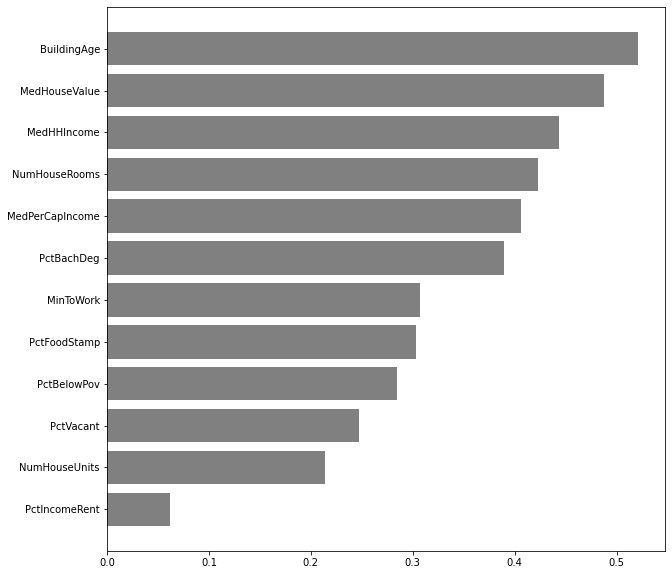

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.barh(
    task_names_acs[acs_descending_order], r2s_acs[acs_descending_order], color="grey"
)

In [8]:
fig.savefig(save_dir / "ACS_barchart.pdf")